Grupa 5 Bartłomiej Strzelczyk, Mikołaj Golowski, Jakub Ludera 

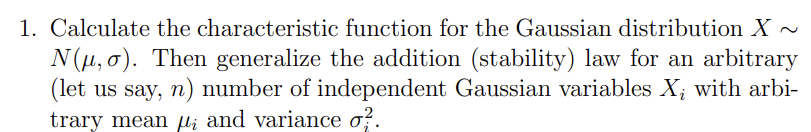

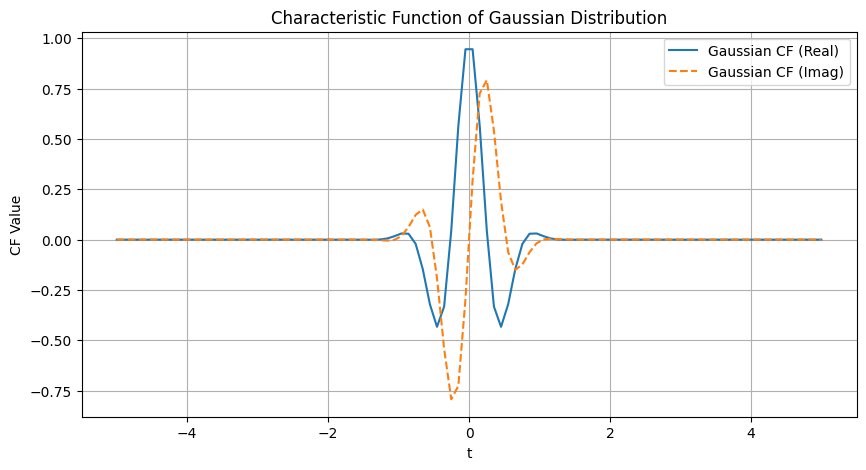

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def characteristic_function_gaussian(t, mu, sigma):
    return np.exp(1j * mu * t - 0.5 * sigma**2 * t**2)

def sum_characteristic_function(t, mus, sigmas):
    mu_sum = sum(mus)
    sigma_sum_sq = sum(s**2 for s in sigmas)
    return np.exp(1j * mu_sum * t - 0.5 * sigma_sum_sq * t**2)

mus = [1, 2, 3]
sigmas = [1, 2, 1.5]
t_values = np.linspace(-5, 5, 100)
y_values_gaussian = sum_characteristic_function(t_values, mus, sigmas)

plt.figure(figsize=(10, 5))
plt.plot(t_values, np.real(y_values_gaussian), label='Gaussian CF (Real)')
plt.plot(t_values, np.imag(y_values_gaussian), label='Gaussian CF (Imag)', linestyle='dashed')
plt.legend()
plt.title('Characteristic Function of Gaussian Distribution')
plt.xlabel('t')
plt.ylabel('CF Value')
plt.grid()
plt.show()

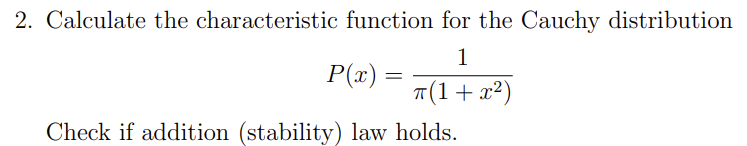

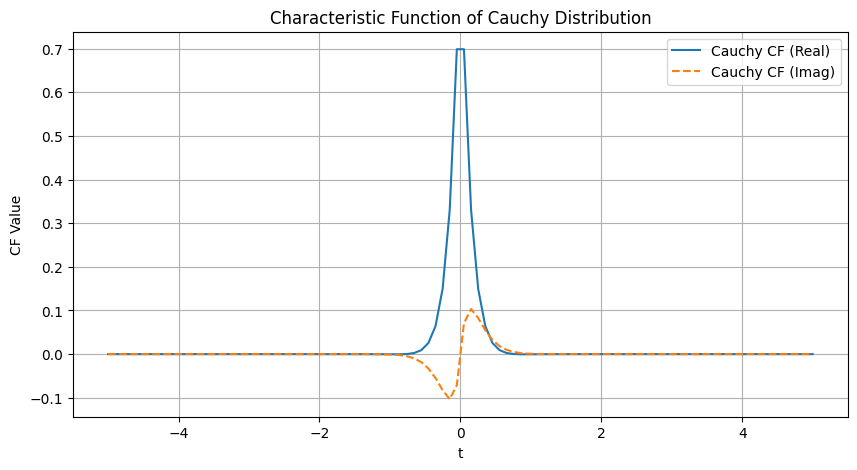

In [13]:
def characteristic_function_cauchy(t, x0, gamma):
    return np.exp(1j * x0 * t - gamma * np.abs(t))

def sum_characteristic_function_cauchy(t, x0_values, gamma_values):
    x0_sum = sum(x0_values)
    gamma_sum = sum(gamma_values)
    return np.exp(1j * x0_sum * t - gamma_sum * np.abs(t))

x0_values = [1, -2, 3]
gamma_values = [1.5, 2.5, 3]
t_values = np.linspace(-5, 5, 100)

y_values = sum_characteristic_function_cauchy(t_values, x0_values, gamma_values)
y_values_cauchy = sum_characteristic_function_cauchy(t_values, x0_values, gamma_values)

plt.figure(figsize=(10, 5))
plt.plot(t_values, np.real(y_values_cauchy), label='Cauchy CF (Real)')
plt.plot(t_values, np.imag(y_values_cauchy), label='Cauchy CF (Imag)', linestyle='dashed')
plt.legend()
plt.title('Characteristic Function of Cauchy Distribution')
plt.xlabel('t')
plt.ylabel('CF Value')
plt.grid()
plt.show()

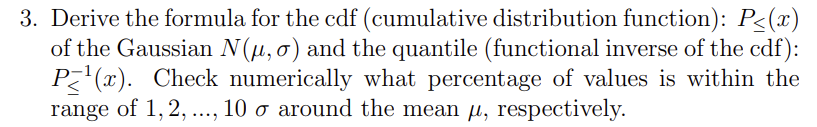

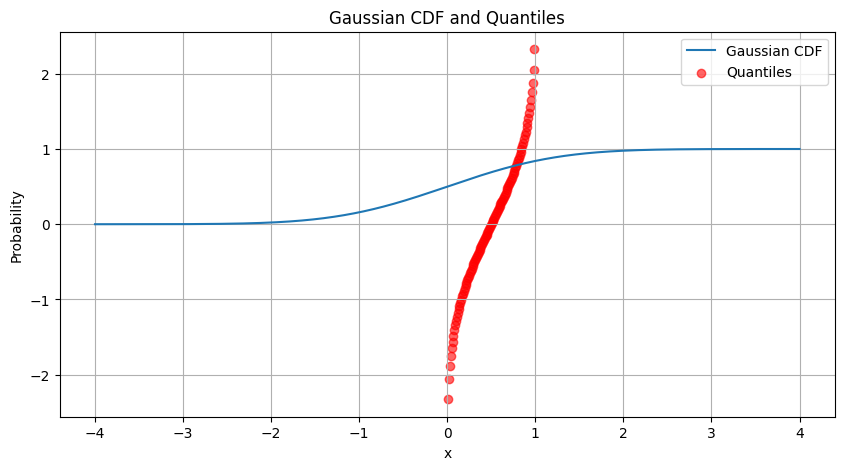

Percentage within 1σ: 68.19%
Percentage within 2σ: 95.44%
Percentage within 3σ: 99.74%
Percentage within 4σ: 99.99%
Percentage within 5σ: 100.00%
Percentage within 6σ: 100.00%
Percentage within 7σ: 100.00%
Percentage within 8σ: 100.00%
Percentage within 9σ: 100.00%
Percentage within 10σ: 100.00%


In [14]:
import scipy.stats as stats

def gaussian_cdf(x, mu, sigma):
    return stats.norm.cdf(x, mu, sigma)

def gaussian_quantile(p, mu, sigma):
    return stats.norm.ppf(p, mu, sigma)

def percentage_within_sigma(mu, sigma, max_sigma=10, num_samples=100000):
    samples = np.random.normal(mu, sigma, num_samples)
    percentages = [(k, np.mean(np.abs(samples - mu) <= k * sigma) * 100) for k in range(1, max_sigma + 1)]
    return percentages

mu, sigma = 0, 1
x_values = np.linspace(-4, 4, 1000)
cdf_values = gaussian_cdf(x_values, mu, sigma)
quantiles = [gaussian_quantile(p, mu, sigma) for p in np.linspace(0.01, 0.99, 100)]
percentages = percentage_within_sigma(mu, sigma)

plt.figure(figsize=(10, 5))
plt.plot(x_values, cdf_values, label='Gaussian CDF')
plt.scatter(np.linspace(0.01, 0.99, 100), quantiles, color='red', label='Quantiles', alpha=0.6)
plt.legend()
plt.title('Gaussian CDF and Quantiles')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid()
plt.show()

for k, percentage in percentages:
    print(f'Percentage within {k}σ: {percentage:.2f}%')

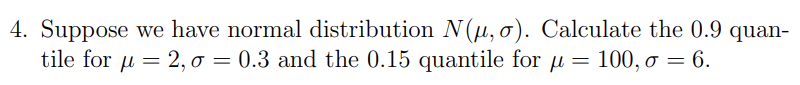

In [15]:
# --- Case 1 ---
# Normal distribution N(µ, σ) with µ = 2, σ = 0.3
mu1 = 2
sigma1 = 0.3
quantile_prob1 = 0.9  # We want the 0.9 quantile

# Calculate the 0.9 quantile
# The ppf (Percent Point Function) is the inverse of the CDF (Cumulative Distribution Function)
# It gives the value x such that P(X <= x) = quantile_prob
quantile_value1 = stats.norm.ppf(quantile_prob1, loc=mu1, scale=sigma1)

print(f"--- Normal Distribution N(µ={mu1}, σ={sigma1}) ---")
print(f"The {quantile_prob1} quantile is: {quantile_value1:.4f}")
print(f"Interpretation: 90% of the values from this distribution are expected to be less than or equal to {quantile_value1:.4f}\n")


# --- Case 2 ---
# Normal distribution N(µ, σ) with µ = 100, σ = 6
mu2 = 100
sigma2 = 6
quantile_prob2 = 0.15 # We want the 0.15 quantile

# Calculate the 0.15 quantile
quantile_value2 = stats.norm.ppf(quantile_prob2, loc=mu2, scale=sigma2)

print(f"--- Normal Distribution N(µ={mu2}, σ={sigma2}) ---")
print(f"The {quantile_prob2} quantile is: {quantile_value2:.4f}")
print(f"Interpretation: 15% of the values from this distribution are expected to be less than or equal to {quantile_value2:.4f}")

--- Normal Distribution N(µ=2, σ=0.3) ---
The 0.9 quantile is: 2.3845
Interpretation: 90% of the values from this distribution are expected to be less than or equal to 2.3845

--- Normal Distribution N(µ=100, σ=6) ---
The 0.15 quantile is: 93.7814
Interpretation: 15% of the values from this distribution are expected to be less than or equal to 93.7814


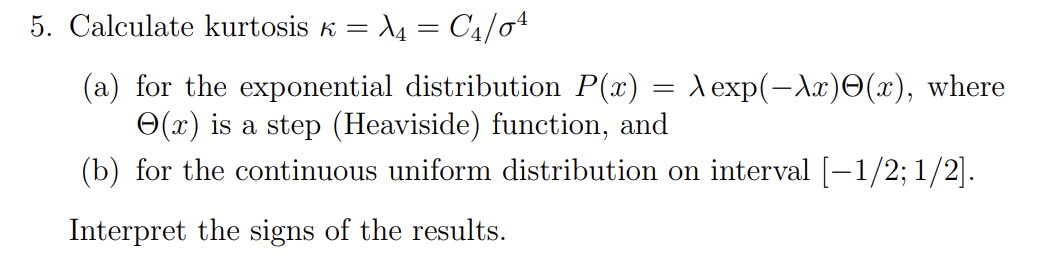

In [16]:
lambda_param = 1.0
E_X = 1 / lambda_param
var_X = 1 / lambda_param**2
sigma_X = np.sqrt(var_X)
C_4 = 9 / lambda_param**4
kurtosis_X = C_4 / sigma_X**4

print(f"Kurtoza dla rozkładu wykładniczego: {kurtosis_X}")

import scipy.stats as stats

kurtosis_exp = stats.expon.stats(moments='k')
print(f"Kurtoza dla rozkładu wykładniczego (zdredukowana): {kurtosis_exp}")

a = -1/2
b = 1/2
mean_X = (a + b) / 2
variance_X = (b - a)**2 / 12
sigma_X = np.sqrt(variance_X)
C_4 = (b - a)**4 / 80
kurtosis_X = C_4 / sigma_X**4

print(f"Kurtoza dla rozkładu jednostajnego na przedziale [{a}, {b}]: {kurtosis_X}")

Kurtoza dla rozkładu wykładniczego: 9.0
Kurtoza dla rozkładu wykładniczego (zdredukowana): 6.0
Kurtoza dla rozkładu jednostajnego na przedziale [-0.5, 0.5]: 1.8000000000000005


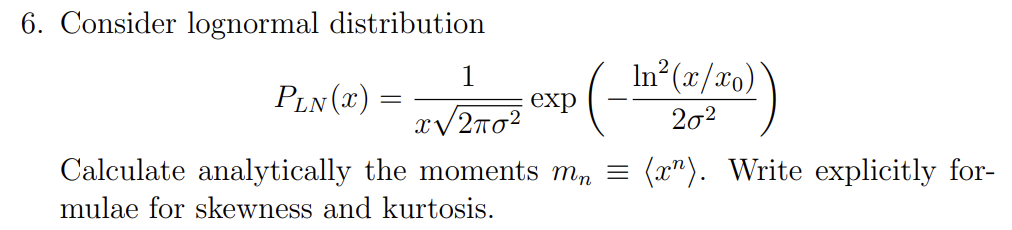

In [17]:
x0 = 1 
sigma = 0.5

def moment(n, x0, sigma):
    return x0**n * np.exp(0.5 * n**2 * sigma**2)

m1 = moment(1, x0, sigma)
m2 = moment(2, x0, sigma)
m3 = moment(3, x0, sigma)
m4 = moment(4, x0, sigma)

skewness = (m3 - 3 * m2 * m1 + 2 * m1**3) / sigma**3
kurtosis = (m4 - 4 * m3 * m1 + 6 * m2 * m1**2 - 3 * m1**4) / sigma**4

print(f"Moment 1 (m1): {m1}")
print(f"Moment 2 (m2): {m2}")
print(f"Moment 3 (m3): {m3}")
print(f"Moment 4 (m4): {m4}")
print(f"Skośność: {skewness}")
print(f"Kurtoza: {kurtosis}")

Moment 1 (m1): 1.1331484530668263
Moment 2 (m2): 1.6487212707001282
Moment 3 (m3): 3.080216848918031
Moment 4 (m4): 7.38905609893065
Skośność: 3.0836944468621326
Kurtoza: 18.93632890654318


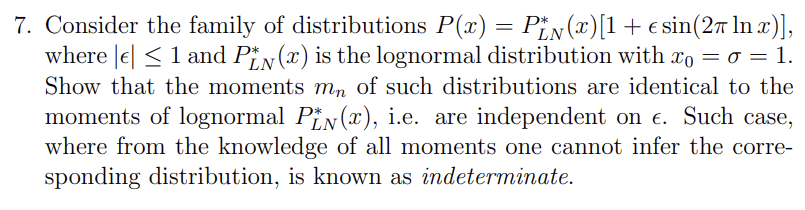

In [21]:
import numpy as np
import scipy.stats as stats
import warnings

# Parameters for the lognormal distribution
mu = 0  # Since x0 = exp(mu) = 1
sigma = 1

# 1. Define the Lognormal PDF P*LN(x)
def lognormal_pdf(x, mu, sigma):
    """Calculates the lognormal PDF value(s)."""
    if isinstance(x, np.ndarray):  # Handle array input
        pdf_vals = np.zeros_like(x, dtype=float)
        mask = x > 0
        pdf_vals[mask] = (1 / (x[mask] * sigma * np.sqrt(2 * np.pi)) *
                          np.exp(-(np.log(x[mask]) - mu)**2 / (2 * sigma**2)))
        return pdf_vals
    else:  # Handle scalar input
        if x <= 0:
            return 0
        return (1 / (x * sigma * np.sqrt(2 * np.pi)) *
                np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)))

# 2. Define the Perturbed PDF P(x)
def perturbed_pdf(x, mu, sigma, epsilon):
    """Calculates the perturbed PDF value(s)."""
    # Handle array input
    pln_x = lognormal_pdf(x, mu, sigma)
    
    if isinstance(x, np.ndarray):  # If x is a numpy array
        perturbation = np.zeros_like(x, dtype=float)
        mask = x > 0
        if epsilon != 0:  # Avoid calculating sin if epsilon is 0
            perturbation[mask] = epsilon * np.sin(2 * np.pi * np.log(x[mask]))
        result = pln_x * (1 + perturbation)
    else:  # Handle scalar input
        perturbation = epsilon * np.sin(2 * np.pi * np.log(x)) if epsilon != 0 else 0
        result = pln_x * (1 + perturbation)
    
    return result

# 3. Define function to calculate the n-th moment numerically
def calculate_numerical_moment(pdf_func, n, *args):
    """
    Calculates the n-th moment E[X^n] = integral x^n * pdf(x) dx from 0 to inf.
    *args are the parameters for the pdf_func (e.g., mu, sigma, epsilon).
    """
    integrand = lambda x: (x**n) * pdf_func(x, *args)

    # Use quad for numerical integration from 0 to infinity
    # Ignore potential integration warnings, especially for higher moments
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        moment_val, abs_error = quad(integrand, 0, np.inf, limit=200)  # Increase limit for potentially tricky integrals

    return moment_val, abs_error

# 4. Analytical moments for Lognormal(mu, sigma)
def analytical_lognormal_moment(n, mu, sigma):
    """Calculates the analytical n-th moment of the lognormal distribution."""
    return np.exp(n * mu + (n**2 * sigma**2) / 2)

# --- Simulation ---
moment_orders = [0, 1, 2, 3, 4]  # Test moments n=0, 1, 2, 3, 4
epsilon_values = [0.0, 0.5, 1.0, -0.5, -1.0]  # Test different epsilon values

print(f"Parameters: mu={mu}, sigma={sigma}")
print("-" * 60)
print(f"{'n':<3} | {'Epsilon':<8} | {'Analytical M_n':<18} | {'Numerical P*_LN M_n':<22} | {'Numerical P(x) M_n':<20}")
print("-" * 60)

results_match = True

for n in moment_orders:
    # Calculate the analytical moment for lognormal
    m_analytical = analytical_lognormal_moment(n, mu, sigma)

    # Calculate numerical moment for the base lognormal (equivalent to epsilon=0)
    m_numerical_pln, err_pln = calculate_numerical_moment(lognormal_pdf, n, mu, sigma)

    print(f"{n:<3} | {'N/A':<8} | {m_analytical:<18.6e} | {m_numerical_pln:<22.6e} (err={err_pln:.1e}) | {'-':<20}")

    for eps in epsilon_values:
        # Calculate numerical moment for the perturbed distribution P(x)
        m_numerical_p, err_p = calculate_numerical_moment(perturbed_pdf, n, mu, sigma, eps)

        # Check if the moment for P(x) matches the analytical/base lognormal moment
        # Use relative tolerance for comparison due to potentially large moment values
        if not np.isclose(m_numerical_p, m_analytical, rtol=1e-5):
            results_match = False
            match_status = "<- MISMATCH"
        else:
            match_status = ""

        print(f"{n:<3} | {eps:<8.2f} | {'-':<18} | {'-':<22} | {m_numerical_p:<20.6e} (err={err_p:.1e}) {match_status}")

    print("-" * 60)

# --- Conclusion ---
print("\nConclusion:")
if results_match:
    print("The numerical moments for P(x) match the analytical moments of P*_LN(x)")
    print("across different values of epsilon, within numerical integration tolerance.")
    print("This supports the claim that the moments are independent of epsilon.")
else:
    print("Potential mismatch found (check output above). This could be due to:")
    print("  - Numerical integration errors (especially for higher n).")
    print("  - A mistake in the formulas or code.")
    print("  - The theoretical result might require more careful numerical treatment.")

print("\nNote: Numerical integration accuracy can decrease for higher moments 'n'")
print("because the integrand x^n * P(x) becomes harder to integrate accurately.")


Parameters: mu=0, sigma=1
------------------------------------------------------------
n   | Epsilon  | Analytical M_n     | Numerical P*_LN M_n    | Numerical P(x) M_n  
------------------------------------------------------------
0   | N/A      | 1.000000e+00       | 1.000000e+00           (err=1.0e-08) | -                   
0   | 0.00     | -                  | -                      | 1.000000e+00         (err=1.0e-08) 
0   | 0.50     | -                  | -                      | 1.000000e+00         (err=1.1e-08) 
0   | 1.00     | -                  | -                      | 1.000000e+00         (err=1.1e-08) 
0   | -0.50    | -                  | -                      | 1.000000e+00         (err=1.1e-08) 
0   | -1.00    | -                  | -                      | 1.000000e+00         (err=1.1e-08) 
------------------------------------------------------------
1   | N/A      | 1.648721e+00       | 1.648721e+00           (err=4.3e-09) | -                   
1   | 0.00     |

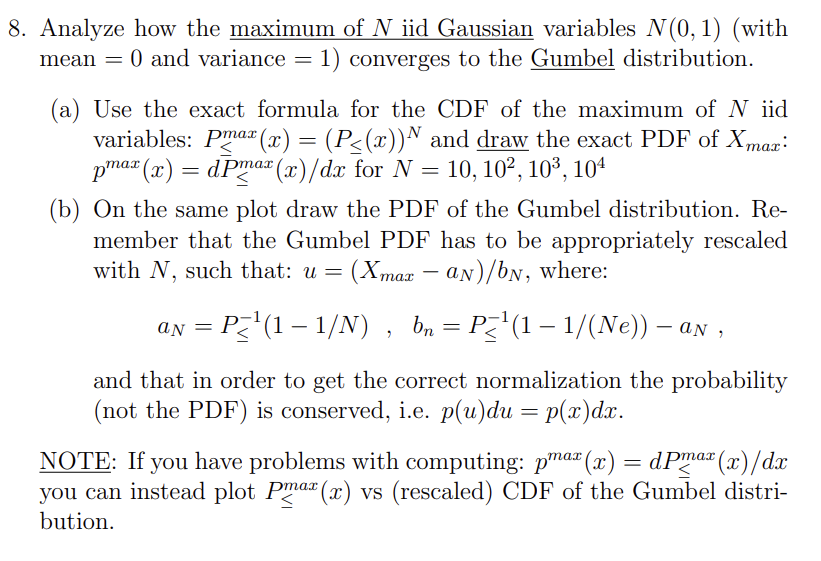

Plotting range estimated from N=10000: x = [2.25, 6.17]

Calculated Gumbel Parameters:
----------------------------
     N |        a_N |        b_N
----------------------------
    10 |     1.2816 |     0.5077
   100 |     2.3263 |     0.3539
  1000 |     3.0902 |     0.2857
 10000 |     3.7190 |     0.2454
----------------------------


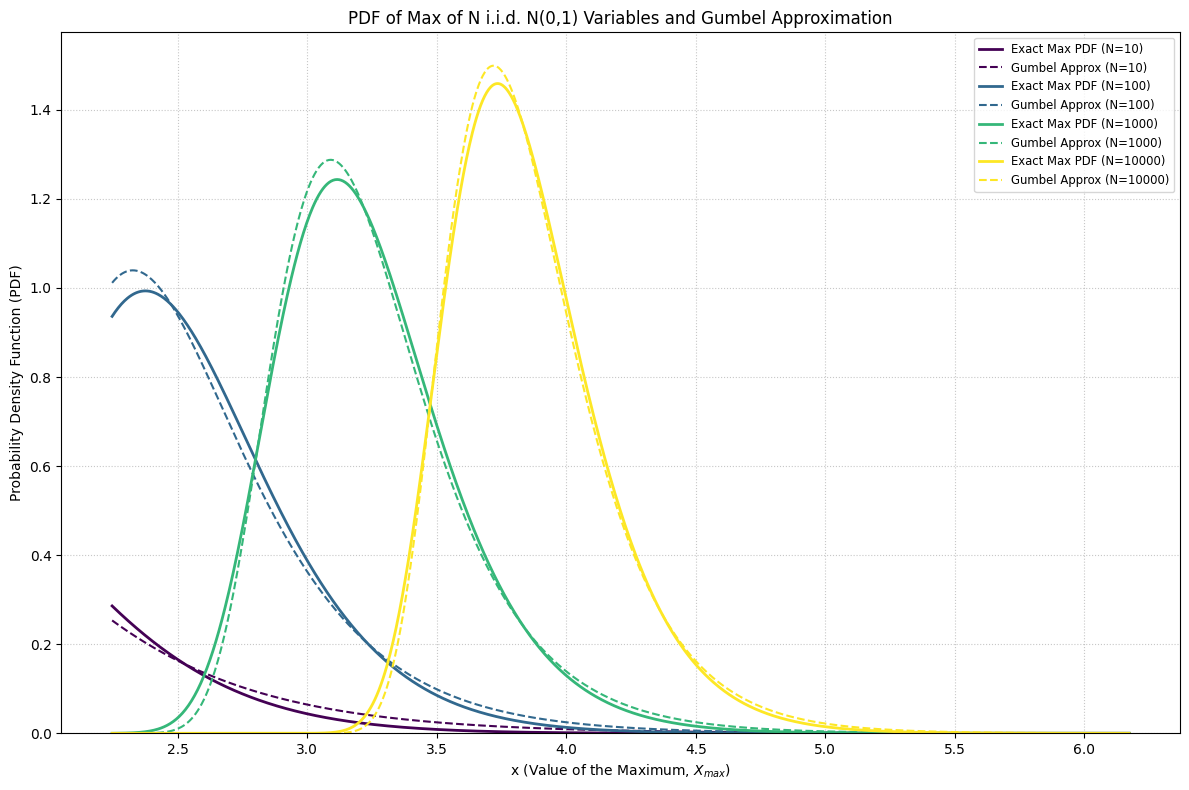

In [20]:
from scipy.stats import norm # For Gaussian (Normal) distribution CDF, PDF, PPF

# --- Basic Gaussian Properties (Standard Normal N(0, 1)) ---
mu, sigma = 0, 1

def F(x):
    """CDF of the standard normal distribution."""
    return norm.cdf(x, loc=mu, scale=sigma)

def f(x):
    """PDF of the standard normal distribution."""
    return norm.pdf(x, loc=mu, scale=sigma)

# --- (a) Exact Distribution of the Maximum ---

def cdf_max(x, N):
    """Exact CDF of the maximum of N i.i.d. N(0, 1) variables."""
    Fx = F(x)
    # Handle cases where F(x) is exactly 0 or 1 for numerical stability
    # F(x)^N can be 0 if F(x)=0. For F(x)=1, F(x)^N = 1.
    # Use np.power for element-wise exponentiation
    return np.power(Fx, N)

def pdf_max(x, N):
    """Exact PDF of the maximum of N i.i.d. N(0, 1) variables."""
    # PDF_max(x) = d/dx [F(x)^N] = N * [F(x)]^(N-1) * f(x)
    Fx = F(x)
    fx = f(x)

    # Numerical stability for Fx close to 0 or 1, especially when N is large.
    # If Fx is very small (e.g., < 1e-10), Fx^(N-1) might underflow or give NaN.
    # If Fx is exactly 0, the PDF should be 0.
    # If Fx is exactly 1, f(x) will be practically 0, so PDF is 0.
    pdf_val = np.zeros_like(x, dtype=float)
    # Calculate only where Fx is reasonably > 0 to avoid log(0) or 0^large_power issues
    valid_mask = (Fx > 1e-15) & (Fx < 1.0) # Avoid exact 0 or 1

    # Using exp(log(...)) can be more stable than direct power for large N-1
    # N * exp((N - 1) * log(Fx)) * f(x)
    pdf_val[valid_mask] = N * np.power(Fx[valid_mask], N - 1) * fx[valid_mask]
    # Handle edge case N=1 separately if needed, though formula works (N * Fx^0 * fx)
    if N==1:
         return fx # Max of 1 is just the variable itself

    return pdf_val

# --- (b) Gumbel Approximation ---

def calculate_aN(N):
    """Calculate the Gumbel location parameter a_N."""
    # aN = F^{-1}(1 - 1/N)
    # Use Percent Point Function (PPF), which is the inverse CDF
    if N <= 1: # Handle N=1 case somewhat reasonably if needed
        return norm.ppf(0.5, loc=mu, scale=sigma) # Median
    # Ensure argument is strictly < 1 for ppf
    prob = min(1.0 - 1.0/N, 1.0 - 1e-16)
    return norm.ppf(prob, loc=mu, scale=sigma)

def calculate_bN(N, aN):
    """Calculate the Gumbel scale parameter b_N."""
    # bN = F^{-1}(1 - 1/(N*e)) - aN
    if N <= 1:
        # Define somewhat arbitrarily for N=1, e.g., Interquartile range
        return norm.ppf(0.75) - norm.ppf(0.25)
    # Ensure argument is strictly < 1 for ppf
    prob = min(1.0 - 1.0/(N * np.e), 1.0 - 1e-16)
    return norm.ppf(prob, loc=mu, scale=sigma) - aN

def gumbel_pdf_standard(u):
    """Standard Gumbel PDF (for variable u)."""
    # PDF = exp(-u - exp(-u))
    return np.exp(-u - np.exp(-u))

def gumbel_pdf_rescaled(x, aN, bN):
    """Rescaled Gumbel PDF expressed as a function of x."""
    # Transformation: u = (x - aN) / bN
    # p(x) = p_gumbel(u) * |du/dx| = p_gumbel((x - aN) / bN) * (1 / bN)
    if bN <= 1e-15: # Avoid division by zero if bN is somehow non-positive/tiny
        return np.zeros_like(x)
    u = (x - aN) / bN
    return (1.0 / bN) * gumbel_pdf_standard(u)

# --- Plotting ---

N_values = [10, 100, 1000, 10000]
# Determine a suitable x-range dynamically based on largest N
N_max = N_values[-1]
aN_max = calculate_aN(N_max)
bN_max = calculate_bN(N_max, aN_max)
# Range covers roughly mean +/- several standard deviations of the Gumbel approx
x_min = aN_max - 6 * bN_max
x_max = aN_max + 10 * bN_max
# Adjust x_min manually if it goes too low (e.g. below 0 for N=10 looks odd)
x_min = max(0, x_min) # Let's start from 0 as max of N(0,1) is likely positive for N>1
print(f"Plotting range estimated from N={N_max}: x = [{x_min:.2f}, {x_max:.2f}]")
x_plot = np.linspace(x_min, x_max, 1000)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values))) # Color map for different N

print("\nCalculated Gumbel Parameters:")
print("----------------------------")
print(f"{'N':>6} | {'a_N':>10} | {'b_N':>10}")
print("----------------------------")

for i, N in enumerate(N_values):
    # Calculate exact PDF of max
    y_exact = pdf_max(x_plot, N)

    # Calculate Gumbel parameters
    aN = calculate_aN(N)
    bN = calculate_bN(N, aN)
    print(f"{N:6d} | {aN:10.4f} | {bN:10.4f}")

    # Calculate rescaled Gumbel PDF
    y_gumbel = gumbel_pdf_rescaled(x_plot, aN, bN)

    # Plot both
    plt.plot(x_plot, y_exact, label=f'Exact Max PDF (N={N})', color=colors[i], linestyle='-', linewidth=2)
    plt.plot(x_plot, y_gumbel, label=f'Gumbel Approx (N={N})', color=colors[i], linestyle='--', linewidth=1.5)

print("----------------------------")

plt.title('PDF of Max of N i.i.d. N(0,1) Variables and Gumbel Approximation')
plt.xlabel('x (Value of the Maximum, $X_{max}$)')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(fontsize='small')
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(bottom=0)
# Optional: adjust ylim if peaks become very high for large N
#ymax_overall = max(pdf_max(calculate_aN(N_max), N_max), gumbel_pdf_rescaled(calculate_aN(N_max), calculate_aN(N_max), calculate_bN(N_max, calculate_aN(N_max))))
#plt.ylim(top=ymax_overall * 1.1) # Adjust ylim based on highest peak roughly
plt.tight_layout()
plt.show()

# --- Optional: Plotting CDFs instead (as per NOTE) ---

# plt.figure(figsize=(12, 8))
# print("\nPlotting CDFs:")
# print("----------------------------")
# print(f"{'N':>6} | {'a_N':>10} | {'b_N':>10}")
# print("----------------------------")

# def gumbel_cdf_standard(u):
#      return np.exp(-np.exp(-u))

# def gumbel_cdf_rescaled(x, aN, bN):
#     if bN <= 1e-15: return np.where(x < aN, 0.0, 1.0) # Step function if bN=0
#     u = (x - aN) / bN
#     return gumbel_cdf_standard(u)

# for i, N in enumerate(N_values):
#     # Calculate exact CDF of max
#     y_exact_cdf = cdf_max(x_plot, N)

#     # Calculate Gumbel parameters
#     aN = calculate_aN(N)
#     bN = calculate_bN(N, aN)
#     print(f"{N:6d} | {aN:10.4f} | {bN:10.4f}")

#     # Calculate rescaled Gumbel CDF
#     y_gumbel_cdf = gumbel_cdf_rescaled(x_plot, aN, bN)

#     # Plot both
#     plt.plot(x_plot, y_exact_cdf, label=f'Exact Max CDF (N={N})', color=colors[i], linestyle='-', linewidth=2)
#     plt.plot(x_plot, y_gumbel_cdf, label=f'Gumbel Approx CDF (N={N})', color=colors[i], linestyle='--', linewidth=1.5)

# print("----------------------------")
# plt.title('CDF of Max of N i.i.d. N(0,1) Variables and Gumbel Approximation')
# plt.xlabel('x (Value of the Maximum, $X_{max}$)')
# plt.ylabel('Cumulative Distribution Function (CDF)')
# plt.legend(fontsize='small')
# plt.grid(True, linestyle=':', alpha=0.7)
# plt.ylim([-0.05, 1.05])
# plt.tight_layout()
# plt.show()